In [342]:
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.metrics import *
from tensorflow.keras.initializers import *
from tensorflow.keras.utils import *
from tensorflow.keras.models import *
from tensorflow.keras.datasets import *
import tensorflow.keras as keras
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import datetime
import os
import pandas as pd
from PIL import Image
from matplotlib import image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping , ModelCheckpoint,ReduceLROnPlateau

In [343]:
main_path="C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\"
open_folder = os.listdir(main_path)
Data_base_learning = main_path+open_folder[3]
Data_base_learning_v2 = main_path+open_folder[4]
path2 = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\"
open_folder1= os.listdir(path2)
Data_train = path2+open_folder1[10]
Data_test = path2+open_folder1[9]
print(open_folder1)
print(Data_test)

['.DS_Store', '.ipynb_checkpoints', '2014', '2015', '2016', '2017', '2018', 'All_years', 'Data_API.ipynb', 'Data_Test_Foot.csv', 'Data_Train_Foot.csv', 'Points_Equipe_Hist', 'Points_Equipe_Hist_VF', 'Recup_Data_Historical.ipynb', 'Teams_puiss.csv', 'Web_Score.ipynb']
C:\Users\Amrta\Documents\GitHub\projetannuel4IABD2\ETAPE_3\Scripts_Recup_Data\Projet_Annuel_Data\Data_Test_Foot.csv


Machine Amrta

In [344]:
filename = "C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Train_Foot.csv"
filename_test= 'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\Scripts_Recup_Data\\Projet_Annuel_Data\\Data_Test_Foot.csv'

Machine Dylane

In [345]:
# filename = 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Train_Foot.csv'
# filename_test= 'Scripts_Recup_Data/Projet_Annuel_Data/Data_Test_Foot.csv

In [346]:
# Chargement des données csv
data= pd.read_csv(filename,sep=";",index_col=0)
data.head()

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2409,6154
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4008,3054
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3029,4815
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2803,2045
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2156,1065


Construction du Y 

In [347]:
# #NbgoalsFullTime 10n23n24n
tab =data.values
for i in tab:
    if i[10]>2.5:
        i[24] = 2
    elif i[10]>1.5:
        i[24] = 1
    elif i[14]>0.5:
        i[24] = 0
    else:
         i[24] = 0
a = tab[:,24]
a.astype(int)

array([2, 1, 0, ..., 1, 2, 1])

In [348]:
data_x = data.copy()
data_x['buts_class'] = a.astype("int64")
data_x

,date,homeTeam,awayTeam,score,mi_temps_gagnante,goalHomeTeam_FullTime,goalAwayTeam_FullTime,goalHomeTeam_HalfTime,goalAwayTeam_HalfTime,NbgoalsHalfTime,...,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away,puissance_HomeTeam,puissance_AwayTeam,buts_class
0,2019-08-09 00:00:00,AS Monaco FC,Olympique Lyonnais,2.0,1,0.0,3.0,0.0,2.0,2.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2409,6154,2
1,2019-08-10 00:00:00,Olympique de Marseille,Stade de Reims,2.0,2,0.0,2.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4008,3054,1
2,2019-08-10 00:00:00,Montpellier HSC,Stade Rennais FC 1901,2.0,1,0.0,1.0,0.0,1.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3029,4815,0
3,2019-08-10 00:00:00,OGC Nice,Amiens SC,1.0,2,2.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2803,2045,2
4,2019-08-10 00:00:00,Stade Brestois 29,Toulouse FC,0.0,1,1.0,1.0,1.0,0.0,1.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2156,1065,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375,2019-05-18,Levante,Ath Madrid,0.0,0,2.0,2.0,2.0,0.0,2.0,...,1.678414,0.437086,0.678414,1.140969,0.660793,0.471366,0.229075,5198,10169,2
376,2019-05-18,Sevilla,Ath Bilbao,1.0,0,2.0,0.0,1.0,0.0,1.0,...,1.268722,0.651982,0.590308,1.312775,1.162996,0.603524,0.519824,9335,6881,1
377,2019-05-18,Valladolid,Valencia,2.0,0,0.0,2.0,0.0,1.0,1.0,...,1.506608,0.297297,0.722467,0.215859,1.246696,0.088106,0.533040,4109,12990,1
378,2019-05-19,Eibar,Barcelona,0.0,1,2.0,2.0,2.0,2.0,4.0,...,2.823789,0.572687,1.074890,1.392070,0.823789,0.629956,0.361233,4455,15917,2


In [349]:
data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','win_cons_home','win_cons_away',
                        'lose_cons_home','lose_cons_away','moy_goals_home','moy_goals_away',
                        'moy_goals_half_home','moy_goals_half_away','moy_goals_conceded_home',
                        'moy_goals_conceded_away','moy_goals_conceded_half_home',
                        'moy_goals_conceded_half_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,win_cons_home,...,lose_cons_home,lose_cons_away,moy_goals_home,moy_goals_away,moy_goals_half_home,moy_goals_half_away,moy_goals_conceded_home,moy_goals_conceded_away,moy_goals_conceded_half_home,moy_goals_conceded_half_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,0,...,1,0,1.214286,1.714286,0.500000,0.750000,1.392857,1.750000,0.535714,0.928571
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,0,...,1,0,1.343750,1.593750,0.625000,0.687500,1.625000,1.250000,0.718750,0.343750
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1,...,0,0,1.428571,1.678571,0.535714,0.642857,1.607143,1.571429,0.892857,0.535714
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,3,...,0,0,1.607143,1.071429,0.892857,0.428571,1.035714,1.250000,0.428571,0.678571
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0,...,2,2,0.857143,0.821429,0.571429,0.392857,1.571429,1.250000,0.678571,0.750000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,1,...,0,0,2.000000,1.566667,0.694444,0.866667,1.166667,1.000000,0.433333,0.400000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0,...,5,1,0.774194,0.833333,0.322581,0.566667,1.366667,1.666667,0.566667,0.700000
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0,...,2,0,0.966667,1.633333,0.400000,0.666667,1.200000,1.066667,0.500000,0.633333
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0,...,2,0,0.806452,0.774194,0.419355,0.483871,1.354839,1.903226,0.612903,0.741935


# Sans les win/lose/cons et les moyennes half_time plus utiles pour les modèles de predic mi-temps

In [350]:
x=data_x[['puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away','moy_goals_conceded_home',
        'moy_goals_conceded_away']]

data_test= pd.read_csv(filename_test,sep=";",index_col=0)
x_prediction=data_test[['date','status','id_match','homeTeam','awayTeam','idHomeTeam','idAwayTeam',
                        'puissance_HomeTeam','puissance_AwayTeam','moy_goals_home','moy_goals_away',
                        'moy_goals_conceded_home','moy_goals_conceded_away']]
x_prediction


,date,status,id_match,homeTeam,awayTeam,idHomeTeam,idAwayTeam,puissance_HomeTeam,puissance_AwayTeam,moy_goals_home,moy_goals_away,moy_goals_conceded_home,moy_goals_conceded_away
1424,2020-07-01,FINISHED,279508,ACF Fiorentina,US Sassuolo Calcio,99,471,2679,3086,1.214286,1.714286,1.392857,1.750000
1085,2020-07-01,FINISHED,273889,Real Betis Balompié,Villarreal CF,90,94,8949,5396,1.343750,1.593750,1.625000,1.250000
1423,2020-07-01,FINISHED,279512,Bologna FC 1909,Cagliari Calcio,103,104,3818,2866,1.428571,1.678571,1.607143,1.571429
1983,2020-07-01,FINISHED,274431,Sporting Clube de Portugal,Gil Vicente FC,498,5533,5314,1346,1.607143,1.071429,1.035714,1.250000
1982,2020-07-01,FINISHED,274433,Os Belenenses Futebol,CD Tondela,5568,1049,1589,1729,0.857143,0.821429,1.571429,1.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,SCHEDULED,274477,Sport Lisboa e Benfica,Sporting Clube de Portugal,1903,498,6562,5314,2.000000,1.566667,1.166667,1.000000
2025,2020-07-26,SCHEDULED,274478,Vitória FC,Os Belenenses Futebol,5620,5568,3593,1589,0.774194,0.833333,1.366667,1.666667
2026,2020-07-26,SCHEDULED,274479,CD Santa Clara,Vitória SC,5530,5543,3175,3593,0.966667,1.633333,1.200000,1.066667
2027,2020-07-26,SCHEDULED,274480,Portimonense SC,CD Aves,5601,5544,1067,1159,0.806452,0.774194,1.354839,1.903226


In [351]:
y = data_x.buts_class
np.unique(y)

array([0, 1, 2], dtype=int64)

In [352]:
x=np.array(x)
y=np.array(y)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

y_train = y_train.astype(np.int)
classes=np.unique(y_train)
nbClasses=len(classes)
print(x_train.shape,y_train.shape)
print(nbClasses)
y_train

(9238, 6) (9238,)
3


array([1, 2, 2, ..., 2, 2, 1])

In [353]:
def create_model():
    
    model = Sequential()
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(512, input_dim=x_train.shape[1], activation='relu'))
    model.add(Dense(128, input_dim=x_train.shape[1], activation='linear'))
    model.add(Dense(3, activation='softmax'))    
    model.compile(loss="sparse_categorical_crossentropy",
                  optimizer=Adam(),
                  metrics=["accuracy"])
    return model

In [354]:
model = create_model()
print(model.summary())

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_149 (Dense)            (None, 512)               3584      
_________________________________________________________________
dense_150 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_151 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_152 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_153 (Dense)            (None, 512)               66048     
_________________________________________________________________
dense_154 (Dense)            (None, 128)               65664     
_________________________________________________________________
dense_155 (Dense)            (None, 128)             

In [355]:
save = ModelCheckpoint('model_buts.h5', monitor = 'val_accuracy' , verbose = 1 , save_best_only = True)

In [356]:
history = model.fit(x_train, y_train,validation_data=(x_test,y_test),batch_size=90,epochs=500,
                    callbacks = [save])

Train on 9238 samples, validate on 2310 samples
Epoch 1/500
9090/9238 [============================>.] - ETA: 0s - loss: 10.6815 - accuracy: 0.3982
Epoch 00001: val_accuracy improved from -inf to 0.38831, saving model to model_buts.h5
9238/9238 [==============================] - 6s 670us/sample - loss: 10.5292 - accuracy: 0.3991 - val_loss: 1.1225 - val_accuracy: 0.3883
Epoch 2/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0870 - accuracy: 0.4747
Epoch 00002: val_accuracy improved from 0.38831 to 0.42771, saving model to model_buts.h5
9238/9238 [==============================] - 2s 232us/sample - loss: 1.0878 - accuracy: 0.4746 - val_loss: 1.0937 - val_accuracy: 0.4277
Epoch 3/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0758 - accuracy: 0.4829
Epoch 00003: val_accuracy improved from 0.42771 to 0.50173, saving model to model_buts.h5
9238/9238 [==============================] - 2s 269us/sample - loss: 1.0750 - accuracy: 0.4835 - val_loss: 1.039

9000/9238 [============================>.] - ETA: 0s - loss: 1.0282 - accuracy: 0.5026
Epoch 00089: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 220us/sample - loss: 1.0276 - accuracy: 0.5039 - val_loss: 1.0314 - val_accuracy: 0.5022
Epoch 90/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0298 - accuracy: 0.5028
Epoch 00090: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 221us/sample - loss: 1.0289 - accuracy: 0.5039 - val_loss: 1.0308 - val_accuracy: 0.5022
Epoch 91/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0274 - accuracy: 0.5036
Epoch 00091: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 225us/sample - loss: 1.0274 - accuracy: 0.5039 - val_loss: 1.0334 - val_accuracy: 0.5022
Epoch 92/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0294 - accuracy: 0.5034
Epoch 00092: val_accuracy did not imp

Epoch 117/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0277 - accuracy: 0.5051
Epoch 00117: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 219us/sample - loss: 1.0284 - accuracy: 0.5039 - val_loss: 1.0325 - val_accuracy: 0.5022
Epoch 118/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0279 - accuracy: 0.5052
Epoch 00118: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 224us/sample - loss: 1.0288 - accuracy: 0.5039 - val_loss: 1.0324 - val_accuracy: 0.5022
Epoch 119/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0274 - accuracy: 0.5046
Epoch 00119: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 226us/sample - loss: 1.0280 - accuracy: 0.5039 - val_loss: 1.0305 - val_accuracy: 0.5022
Epoch 120/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0261 - accuracy: 0.5052
Epoch 00120: val_acc

Epoch 145/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0287 - accuracy: 0.5045
Epoch 00145: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 223us/sample - loss: 1.0291 - accuracy: 0.5039 - val_loss: 1.0343 - val_accuracy: 0.5022
Epoch 146/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0284 - accuracy: 0.5035 E - ETA: 0s - loss: 1.0275 - accuracy: 
Epoch 00146: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 222us/sample - loss: 1.0282 - accuracy: 0.5039 - val_loss: 1.0310 - val_accuracy: 0.5022
Epoch 147/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0264 - accuracy: 0.5058
Epoch 00147: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 221us/sample - loss: 1.0275 - accuracy: 0.5039 - val_loss: 1.0334 - val_accuracy: 0.5022
Epoch 148/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0279

Epoch 173/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0296 - accuracy: 0.5036
Epoch 00173: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 217us/sample - loss: 1.0293 - accuracy: 0.5039 - val_loss: 1.0315 - val_accuracy: 0.5022
Epoch 174/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0286 - accuracy: 0.5042
Epoch 00174: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 217us/sample - loss: 1.0289 - accuracy: 0.5039 - val_loss: 1.0308 - val_accuracy: 0.5022
Epoch 175/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0280 - accuracy: 0.5041
Epoch 00175: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 210us/sample - loss: 1.0280 - accuracy: 0.5039 - val_loss: 1.0304 - val_accuracy: 0.5022
Epoch 176/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0303 - accuracy: 0.5028 ETA: 
Epoch 00176: v

Epoch 00200: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 215us/sample - loss: 1.0279 - accuracy: 0.5039 - val_loss: 1.0300 - val_accuracy: 0.5022
Epoch 201/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0269 - accuracy: 0.5043
Epoch 00201: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 216us/sample - loss: 1.0274 - accuracy: 0.5039 - val_loss: 1.0336 - val_accuracy: 0.5022
Epoch 202/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0276 - accuracy: 0.5040
Epoch 00202: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 210us/sample - loss: 1.0277 - accuracy: 0.5039 - val_loss: 1.0332 - val_accuracy: 0.5022
Epoch 203/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0295 - accuracy: 0.5034 ETA: 0s - l
Epoch 00203: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 2s 221us/

8820/9238 [===========================>..] - ETA: 0s - loss: 1.0355 - accuracy: 0.5036
Epoch 00228: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 121us/sample - loss: 1.0354 - accuracy: 0.5039 - val_loss: 1.0373 - val_accuracy: 0.5022
Epoch 229/500
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0333 - accuracy: 0.5066
Epoch 00229: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 120us/sample - loss: 1.0351 - accuracy: 0.5039 - val_loss: 1.0374 - val_accuracy: 0.5022
Epoch 230/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0348 - accuracy: 0.5044
Epoch 00230: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 119us/sample - loss: 1.0354 - accuracy: 0.5039 - val_loss: 1.0375 - val_accuracy: 0.5022
Epoch 231/500
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0349 - accuracy: 0.5042
Epoch 00231: val_accuracy did not 

Epoch 256/500
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0372 - accuracy: 0.5035
Epoch 00256: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 116us/sample - loss: 1.0369 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 257/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0375 - accuracy: 0.5031
Epoch 00257: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 117us/sample - loss: 1.0370 - accuracy: 0.5039 - val_loss: 1.0381 - val_accuracy: 0.5022
Epoch 258/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0370 - accuracy: 0.5037
Epoch 00258: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 114us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0380 - val_accuracy: 0.5022
Epoch 259/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0370 - accuracy: 0.5039
Epoch 00259: val_acc

Epoch 284/500
8640/9238 [===========================>..] - ETA: 0s - loss: 1.0375 - accuracy: 0.5031
Epoch 00284: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0370 - accuracy: 0.5039 - val_loss: 1.0382 - val_accuracy: 0.5022
Epoch 285/500
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0367 - accuracy: 0.5042
Epoch 00285: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 111us/sample - loss: 1.0370 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 286/500
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0373 - accuracy: 0.5033
Epoch 00286: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 106us/sample - loss: 1.0369 - accuracy: 0.5039 - val_loss: 1.0380 - val_accuracy: 0.5022
Epoch 287/500
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0369 - accuracy: 0.5040
Epoch 00287: val_acc

Epoch 312/500
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0369 - accuracy: 0.5039
Epoch 00312: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 104us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 313/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0368 - accuracy: 0.5039
Epoch 00313: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 106us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 314/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0377 - accuracy: 0.5025
Epoch 00314: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 105us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0380 - val_accuracy: 0.5022
Epoch 315/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0370 - accuracy: 0.5037
Epoch 00315: val_acc

Epoch 340/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0376 - accuracy: 0.5027
Epoch 00340: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 129us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0380 - val_accuracy: 0.5022
Epoch 341/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0373 - accuracy: 0.5032
Epoch 00341: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 154us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0380 - val_accuracy: 0.5022
Epoch 342/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0366 - accuracy: 0.5042 ETA: 0s - loss: 1.0359 - accu
Epoch 00342: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 162us/sample - loss: 1.0369 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 343/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0364 - accurac

Epoch 368/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0360 - accuracy: 0.5051
Epoch 00368: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 369/500
8820/9238 [===========================>..] - ETA: 0s - loss: 1.0364 - accuracy: 0.5045
Epoch 00369: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 126us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 370/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0368 - accuracy: 0.5039
Epoch 00370: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 135us/sample - loss: 1.0367 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 371/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0373 - accuracy: 0.5034
Epoch 00371: val_acc

Epoch 396/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0358 - accuracy: 0.5054
Epoch 00396: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0380 - val_accuracy: 0.5022
Epoch 397/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0362 - accuracy: 0.5047
Epoch 00397: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 111us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 398/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0371 - accuracy: 0.5034
Epoch 00398: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 113us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 399/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0373 - accuracy: 0.5032
Epoch 00399: val_acc

Epoch 424/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0365 - accuracy: 0.5042
Epoch 00424: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 425/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0377 - accuracy: 0.5025
Epoch 00425: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 109us/sample - loss: 1.0367 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 426/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0372 - accuracy: 0.5030
Epoch 00426: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 118us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0380 - val_accuracy: 0.5022
Epoch 427/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0377 - accuracy: 0.5029
Epoch 00427: val_acc

Epoch 452/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0378 - accuracy: 0.5022
Epoch 00452: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0367 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 453/500
8910/9238 [===========================>..] - ETA: 0s - loss: 1.0372 - accuracy: 0.5034
Epoch 00453: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 116us/sample - loss: 1.0367 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 454/500
9180/9238 [============================>.] - ETA: 0s - loss: 1.0360 - accuracy: 0.5049
Epoch 00454: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 122us/sample - loss: 1.0367 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 455/500
8730/9238 [===========================>..] - ETA: 0s - loss: 1.0393 - accuracy: 0.5002
Epoch 00455: val_acc

Epoch 480/500
9090/9238 [============================>.] - ETA: 0s - loss: 1.0370 - accuracy: 0.5035
Epoch 00480: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0367 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 481/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0378 - accuracy: 0.5024
Epoch 00481: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 111us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 482/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0376 - accuracy: 0.5029
Epoch 00482: val_accuracy did not improve from 0.50260
9238/9238 [==============================] - 1s 112us/sample - loss: 1.0368 - accuracy: 0.5039 - val_loss: 1.0379 - val_accuracy: 0.5022
Epoch 483/500
9000/9238 [============================>.] - ETA: 0s - loss: 1.0366 - accuracy: 0.5041
Epoch 00483: val_acc

Text(0, 0.5, 'Accuracy')

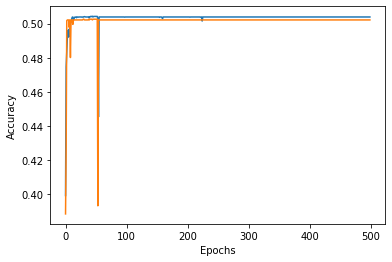

In [357]:
plt.plot(history.history['accuracy'],label='Accuracy')#bleu
plt.plot(history.history['val_accuracy'],label='validation_Accuracy')#orange
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Prédiction

In [358]:
unique = x_prediction.values

results = []
zero =[]
un = []
deux = []
i = 0
x_train.shape
predictions_final = model.predict(np.array([x_train[1]]))
predictions_final.shape

(1, 3)

In [359]:
model.load_weights("model_buts.h5")

In [360]:
for i in unique:
    predictions_final = model.predict(np.array([[i[7],i[8],i[9],i[10],i[11],i[12]]])) 
    result = np.argmax(predictions_final)
    results.append(result)
    pred0 =round(predictions_final[0][0],2)
    zero.append(pred0)
    pred1 =round(predictions_final[0][1],2)
    un.append(pred1)
    pred2 =round(predictions_final[0][2],2)
    deux.append(pred2)
    print(result,predictions_final)

2 [[0.278184   0.23252921 0.4892868 ]]
2 [[0.23323534 0.2758901  0.49087453]]
2 [[0.27077746 0.25366512 0.4755574 ]]
2 [[0.21867824 0.22409591 0.5572259 ]]
2 [[0.28944045 0.24040201 0.4701576 ]]
2 [[0.13937442 0.1883676  0.672258  ]]
2 [[0.25166672 0.1957442  0.5525891 ]]
2 [[0.28541505 0.22255456 0.49203035]]
2 [[0.26928985 0.21842186 0.51228833]]
2 [[0.17946991 0.20866397 0.61186606]]
2 [[0.22981094 0.25034207 0.519847  ]]
2 [[0.26509795 0.2488673  0.48603475]]
2 [[0.21948625 0.24766248 0.5328513 ]]
2 [[0.23621784 0.24510185 0.5186803 ]]
2 [[0.21192619 0.24863891 0.53943485]]
2 [[0.21144214 0.1729703  0.61558753]]
2 [[0.27448973 0.20968407 0.5158263 ]]
2 [[0.2708498  0.25386223 0.475288  ]]
2 [[0.16799119 0.20533979 0.62666905]]
2 [[0.2524578  0.23766322 0.509879  ]]
2 [[0.25536782 0.2511958  0.49343646]]
2 [[0.2198992  0.22690691 0.5531938 ]]
2 [[0.21319917 0.22061375 0.566187  ]]
2 [[0.28583315 0.22105151 0.49311534]]
2 [[0.2728289  0.19330299 0.53386813]]
2 [[0.26093313 0.2475316 

2 [[0.27518043 0.21001326 0.51480633]]
2 [[0.28060612 0.24264947 0.4767444 ]]
2 [[0.27980733 0.25794503 0.4622476 ]]
2 [[0.23014003 0.27446592 0.49539408]]
2 [[0.2234274 0.2425213 0.5340513]]
2 [[0.27168944 0.26296607 0.4653445 ]]
2 [[0.21570785 0.21064004 0.573652  ]]
2 [[0.2619705  0.23958237 0.49844712]]
2 [[0.28737566 0.23556474 0.47705963]]
2 [[0.2994688  0.22599562 0.4745356 ]]
2 [[0.27099407 0.24000734 0.48899862]]
2 [[0.28461128 0.23286492 0.48252377]]
2 [[0.2929784  0.22706325 0.47995833]]
2 [[0.20079516 0.249096   0.55010885]]
2 [[0.24449955 0.28122976 0.47427064]]
2 [[0.2036493 0.2530523 0.5432984]]
2 [[0.18856552 0.27369702 0.5377374 ]]
2 [[0.25750867 0.2394415  0.5030498 ]]
2 [[0.2601685  0.26425767 0.47557378]]
2 [[0.26096663 0.21708962 0.5219438 ]]
2 [[0.29047057 0.23842143 0.47110802]]
2 [[0.26076522 0.23626326 0.5029716 ]]
2 [[0.27767313 0.25946382 0.462863  ]]
2 [[0.26117235 0.24019526 0.49863243]]
2 [[0.3005962  0.22823365 0.4711701 ]]
2 [[0.2946261  0.23726599 0.468

In [361]:
df = {'date':x_prediction.date,'id_match':x_prediction.id_match,'status':x_prediction.status,'id_HomeTeam':x_prediction.idHomeTeam,'id_AwayTeam':x_prediction.idAwayTeam,
      'homeTeam':x_prediction.homeTeam,'AwayTeam':x_prediction.awayTeam,'< 0,5 buts':zero,'< 1,5 buts':un,'< 2,5 buts':deux}
df = pd.DataFrame(df)
df

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
1424,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,0.28,0.23,0.49
1085,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,0.23,0.28,0.49
1423,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,0.27,0.25,0.48
1983,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,0.22,0.22,0.56
1982,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,0.29,0.24,0.47
...,...,...,...,...,...,...,...,...,...,...
2024,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.24,0.25,0.51
2025,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.26,0.25,0.49
2026,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.27,0.23,0.50
2027,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.29,0.24,0.46


In [362]:
df.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.csv',index = False)
df.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs.json')

In [363]:
finished = []
scheduled = []

In [364]:
for i in df.values:
    if i[2] == 'FINISHED':
        finished.append(i)
    else:
        scheduled.append(i)

In [365]:
column_names = ["date","id_match", "status","id_HomeTeam","id_AwayTeam","homeTeam","AwayTeam","< 0,5 buts","< 1,5 buts","< 2,5 buts"]
df_fini = pd.DataFrame(finished,columns = column_names)
df_programme = pd.DataFrame(scheduled,columns = column_names)

In [366]:
df_fini

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
0,2020-07-01,279508,FINISHED,99,471,ACF Fiorentina,US Sassuolo Calcio,0.28,0.23,0.49
1,2020-07-01,273889,FINISHED,90,94,Real Betis Balompié,Villarreal CF,0.23,0.28,0.49
2,2020-07-01,279512,FINISHED,103,104,Bologna FC 1909,Cagliari Calcio,0.27,0.25,0.48
3,2020-07-01,274431,FINISHED,498,5533,Sporting Clube de Portugal,Gil Vicente FC,0.22,0.22,0.56
4,2020-07-01,274433,FINISHED,5568,1049,Os Belenenses Futebol,CD Tondela,0.29,0.24,0.47
...,...,...,...,...,...,...,...,...,...,...
82,2020-07-09,279534,FINISHED,450,108,Hellas Verona FC,FC Internazionale Milano,0.23,0.20,0.57
83,2020-07-09,273907,FINISHED,89,88,RCD Mallorca,Levante UD,0.29,0.22,0.49
84,2020-07-09,273913,FINISHED,278,745,SD Eibar,CD Leganés,0.26,0.25,0.49
85,2020-07-09,264674,FINISHED,62,340,Everton FC,Southampton FC,0.27,0.25,0.48


In [367]:
df_programme

,date,id_match,status,id_HomeTeam,id_AwayTeam,homeTeam,AwayTeam,"< 0,5 buts","< 1,5 buts","< 2,5 buts"
0,2020-07-11,264686,SCHEDULED,68,563,Norwich City FC,West Ham United FC,0.29,0.23,0.48
1,2020-07-11,264689,SCHEDULED,346,67,Watford FC,Newcastle United FC,0.28,0.22,0.50
2,2020-07-11,264683,SCHEDULED,64,328,Liverpool FC,Burnley FC,0.11,0.17,0.72
3,2020-07-11,264687,SCHEDULED,356,61,Sheffield United FC,Chelsea FC,0.27,0.19,0.53
4,2020-07-11,264688,SCHEDULED,397,65,Brighton & Hove Albion FC,Manchester City FC,0.22,0.19,0.59
...,...,...,...,...,...,...,...,...,...,...
172,2020-07-26,274477,SCHEDULED,1903,498,Sport Lisboa e Benfica,Sporting Clube de Portugal,0.24,0.25,0.51
173,2020-07-26,274478,SCHEDULED,5620,5568,Vitória FC,Os Belenenses Futebol,0.26,0.25,0.49
174,2020-07-26,274479,SCHEDULED,5530,5543,CD Santa Clara,Vitória SC,0.27,0.23,0.50
175,2020-07-26,274480,SCHEDULED,5601,5544,Portimonense SC,CD Aves,0.29,0.24,0.46


In [368]:
df_fini.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.csv',index=False)
df_fini.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_finished.json')

In [369]:
df_programme.to_csv('C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.csv',index=False)
df_programme.to_json (r'C:\\Users\\Amrta\\Documents\\GitHub\\projetannuel4IABD2\\ETAPE_3\\predict_buts_matchs\\predictions_buts_matchs_scheduled.json')